In [197]:
# Importing core libraries required for the case study
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sea
import datetime as dt
import warnings

loan = pd.read_csv('./dataset/loan.csv', low_memory=False)

loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Data Dictionary Review
Loading all data dictionary values

In [198]:
dict = pd.read_csv('./dataset/Data_Dictionary.csv')
dict

,LoanStatNew,Description,Status,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,acc_now_delinq,The number of accounts on which the borrower i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,acc_open_past_24mths,Number of trades opened in past 24 months.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,addr_state,The state provided by the borrower in the loan...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,all_util,Balance to credit limit on all trades,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,annual_inc,The self-reported annual income provided by th...,Not Decided,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
112,verification_status,"Indicates if income was verified by LC, not ve...",Not Decided,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...,Not Decided,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,zip_code,The first 3 numbers of the zip code provided b...,Not Decided,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning and Manipulation
Aiming to clean and manipulate the data to finally reach a data form where we can work with the data. Will wilcude the following steps while cleaning and manipulating data.
1. Find the number of columns which do not have any data.
2. Drop unwanted and duplicate rows.
3. Dropping text/description columns which will not contribute to overall analysis
4. Dropping column sub_grade as the current analysis will limit to Grade only
5. Dropping all columns which refer to behavioural data of customer post loan approval
6. Dropping columns which is unique id in nature. They dont contribute to loan analysis
7. Dropping all columns where all the values are NA
8. Dropping all columns with all zero values
9. Drop all columns who have constant values (ignoring NA value)
10. Drop the column if the amount of empty values is more than 65%


## Getting the summary of all columns which contain null values
Print summary of Nulls, Blanks in the dataset the ine form a percentage value.

In [199]:
(loan.isnull().sum() / len(loan.index) * 100)

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

## Removing All Rows With loan_status = "Current"
Loan Status - Key Leading Attribute (loan_status). The column has three distinct values
- Fully-Paid - The customer has successfuly paid the loan
- Charged-Off - The customer is "Charged-Off" ir has "Defaulted"
- Current - These customers, the loan is currently in progress and cannot contribute to conclusive evidence if the customer will default of pay in future
**For the given case study, "Current" status rows will be ignored**

In [200]:
prev_rows = len(loan)
# The rows where loan_stats=Current are the data where the loan repayment is currently in progress
# The loans which are currently in progress will not contribute to decisions
# of default or pass as it's difficult to predict the outcome
#
# Dropping the rows early as, dropping all Current rows introduces NA columns which can be easily dropped
loan = loan[loan['loan_status'] != "Current"]

# Print current data statistics after dropping rows with loan_status "CURRENT"
curr_rows = len(loan)
print(curr_rows)
print(prev_rows)

print("Number of rows dropped where loan_status = 'Current':", (prev_rows - curr_rows))
print("Percentage of rows dropped = ", round((prev_rows - curr_rows) / prev_rows * 100, 2), "%")

38577
39717
Number of rows dropped where loan_status = 'Current': 1140
Percentage of rows dropped =  2.87 %


### Find any duplicate rows in the dataset

In [201]:
duplicate_rows = len(loan[loan.duplicated()])
if duplicate_rows <= 0:
    print("Duplicate Rows: ", duplicate_rows)
    print("No action needed")
else:
    print(len(duplicate_rows))

Duplicate Rows:  0
No action needed


### Dropping Columns That Have ID Values
Dropping columns which is unique id in nature. They dont contribute to loan analysis

In [202]:
# Checking if member_id is unique
if len(loan['member_id'].unique()) == loan.shape[0]:
    print("member_id is unique, can be dropped")
    loan = loan.drop(['member_id'], axis=1)
else:
    print("member_id is not unique, dont drop")

# Checking if id is unique
if len(loan['id'].unique()) == loan.shape[0]:
    print("id is unique, can be dropped")
    # not dropping id as it will be used for pivot calculation later
    # loan = loan.drop(['id'],  axis=1)
else:
    print("id is not unique, dont drop")

member_id is unique, can be dropped
id is unique, can be dropped


### Dropping text/description columns which will not contribute to overall analysis
These are names of establishment etc which will not contribute to loan pass or failure. The URL column is a static link with id as the attribute. It's a redundant column

In [203]:
loan = loan.drop(['url', 'emp_title', 'desc', 'title'], axis=1)

### Dropping column sub_grade as the current analysis will limit to Grade only

In [204]:
loan = loan.drop(['sub_grade'], axis=1)

### Dropping all columns which refer to behavioural data of customer post loan approval
Behaviour data of the customers are captured post the loan approval. The data is not available at the time of loan approval and thus cannot be used for calculations

In [205]:
loan = loan.drop(['delinq_2yrs', 'earliest_cr_line',
                  'inq_last_6mths', 'open_acc', 'pub_rec',
                  'revol_bal', 'revol_util', 'total_acc',
                  'out_prncp', 'out_prncp_inv', 'total_pymnt',
                  'total_pymnt_inv', 'total_rec_prncp',
                  'total_rec_int', 'total_rec_late_fee', 'recoveries',
                  'collection_recovery_fee', 'last_pymnt_d',
                  'last_pymnt_amnt', 'last_credit_pull_d',
                  'application_type'], axis=1)

### Dropping all columns whose all the values are NA
Print all NA columns for verification

In [206]:
print("Total columns with values NA: ", len(loan.columns[loan.isna().all()].tolist()),"\n\n")
print("Columns with all values as NA\n", loan.columns[loan.isna().all()].tolist())

# Dropping all the columns whose all the records are NaN or Null
loan = loan.dropna(axis='columns', how="all")

Total columns with values NA:  55 


Columns with all values as NA
 ['next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_7

### Dropping all columns with all zero values

In [207]:
loan = loan.loc[:, (loan != 0).any(axis=0)]

### Function to Drop all columns who have constant values (ignoring NA value)
- Example most of the columns is 1 and rest is NA, the column will be dropped
- If we have 1,2 and NA, the column wont be dropped

In [208]:
print("Columns with constant values with or without NA")
def drop_constant_columns(df):
    for c in df.columns:
        if df[c].nunique(dropna=True) == 1:
            print(c)
            df = df.drop(c, axis=1)
    return df

# Drop all constant columns from df1 (definition of constant is constant value across the rows, this ignores Na values)
loan = drop_constant_columns(loan)

Columns with constant values with or without NA
pymnt_plan
initial_list_status
collections_12_mths_ex_med
policy_code
chargeoff_within_12_mths
tax_liens


### Drop Columns With More Than 65% Empty Values
Function `drop_mostly_empty_columns` which checks the amount of empty values in a dataframe and drops the column if the amount of empty values is more than 65%. 60% is the threshhold percentage which decides imputing vs dropping.

In [209]:
print("Columns with more that 65% empty records")
def drop_mostly_empty_columns(df):
    total_rows = len(df)
    for c in df.columns:
        # Drop columns whose mean na values exceed 65%
        if df[c].isna().mean().round(2) >= 0.65:
            print(c)
            df = df.drop(c, axis=1)
    return df
loan = drop_mostly_empty_columns(loan)

Columns with more that 65% empty records
mths_since_last_delinq
mths_since_last_record


# Data Conversion
Since we have removed unwanted data from the dataset now we can focus on data conversion. During this process we will focus on the following:
1. Converting columns to floats where needed.
2. Converting required columns to integers if they can be converted and exist as strings in dataset.
3. Round off any values in the columns which have floating point values with more than 2 decimal places.
4. Convert the columns loan_amnt and funded_amnt as flot64
5. Convert the term column into an integer from a string
6. Convert int_rate to  float by removing the "%" character
7. Round off the values of key float fields to 2 decimal place
8. Converting the loan_status to boolean column. "Fully-Paid is True and Charged Off is False"
9. Converting the column issue_d from string object to DateTime

#### Convert the columns loan_amnt and funded_amnt as float64

In [210]:
loan = loan.astype({'loan_amnt':'float','funded_amnt':'float'})

#### Convert the term column into an integer from a string

In [211]:
loan['term'] = loan['term'].apply(lambda x : int(x[:-7]))

#### Convert int_rate to  float by removing the "%" character

In [212]:
loan['int_rate'] = loan['int_rate'].apply(lambda x : float(x[:-1]))

#### Round off the values of key float fields to 2 decimal place

In [213]:
print("Rounding columns to 2 decimal places")
for c in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']:
    print(c)
    loan[c] = loan[c].apply(lambda x: round(x,2))

Rounding columns to 2 decimal places
loan_amnt
funded_amnt
funded_amnt_inv
int_rate
dti


#### Converting the loan_status to boolean column.
"Fully-Paid is True and Charged Off is False"
- Added a function instead of lambda because, if this is accidentally re-run on a boolean column, the logic broke
- Now it will only convert to boolean if the column is a string and has the two specific values

In [214]:
def convert_loan_status_to_boolean(x):
    if x == "Fully Paid":
        return True
    elif x == "Charged Off":
        return False
    else:
        return x

In [215]:
# Converting the column issue_d from string object to DateTime
loan['issue_d'] = pd.to_datetime(loan['issue_d'], format='%b-%y')

### Deciding to Impute Or Drop Columns
Evaluating the percentage of rows with blank values for both the columns. If the total percentage is less than 5% will take an option of dropping the columns vs imputing.

In [216]:
# Identify columns who have blank values and what percentage of total values are there blanks.
# These values may need to be imputed
print('emp_length blank rows', loan['emp_length'].isna().sum())
print('pub_rec_bankruptcies blank rows', loan['pub_rec_bankruptcies'].isna().sum(), "\n")
imp_total = 0
for c in loan.columns[loan.isna().any()].tolist():
    imp_val = len(loan[loan[c].isna()]) / len(loan) * 100
    imp_total += imp_val
    print(c, round(imp_val, 2),"%")
print("\nTotal rows percentage whose columns are blank: ", round(imp_total ,2), "%")

emp_length blank rows 1033
pub_rec_bankruptcies blank rows 697 

emp_length 2.68 %
pub_rec_bankruptcies 1.81 %

Total rows percentage whose columns are blank:  4.48 %


#### Converting emp_length to integer values
Converting emp_length as numerical data to create more effective statistical analysis as compared to nominal values


In [217]:
loan['emp_length'] = loan['emp_length'].replace({'< 1 year': 0, '2 years': 2, '3 years': 3,
                                                 '7 years': 7, '4 years': 4, '5 years': 5,
                                                 '1 year': 1, '6 years': 6, '8 years': 8,
                                                 '9 years': 9,  '10+ years': 10})

In [218]:
# Save the current dimensions of the dataframe in a variable rows_before
rows_before = len(loan)

# Drop rows with empty values in this scenario
Since the percent of rows is very small, dropping the rows instead of imputing them

In [219]:
loan = loan[loan['emp_length'].notna()]
loan = loan[loan['pub_rec_bankruptcies'].notna()]

# Checking if blanks exist
loan['emp_length'].value_counts()

10.0    8369
0.0     4341
2.0     4207
3.0     3951
4.0     3297
5.0     3161
1.0     3077
6.0     2136
7.0     1689
8.0     1410
9.0     1209
Name: emp_length, dtype: int64

In [220]:
# Print the dimensions of the dataframe after dropping rows
rows_after = len(loan)
print("Number of rows dropped = ,", (rows_before - rows_after))
print("Percentage of rows dropped = ", round((rows_before - rows_after)/rows_before*100,2),"%")
print(loan.shape)

Number of rows dropped = , 1730
Percentage of rows dropped =  4.48 %
(36847, 19)


## Deriving Additional Columns
Adding additional column for Year and Month for analysis extracting Year and Month from issue_d

In [221]:
loan['issue_y'] = pd.DatetimeIndex(loan['issue_d']).year
loan['issue_m'] = pd.DatetimeIndex(loan['issue_d']).month

In [222]:
# Diving Months to quarters
def bucket_issue_m(column):
    if column < 4:
        return 'Q1'
    elif (column >= 4) and (column < 7):
        return 'Q2'
    elif (column >= 7) and (column < 9):
        return 'Q3'
    else:
        return 'Q4' # 75% quartile

loan['issue_q'] = loan.apply(lambda x : bucket_issue_m(x['issue_m']), axis = 1)

In [223]:
loan['loan_amnt'].describe()

count    36847.000000
mean     11141.327652
std       7369.988994
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [224]:
# Binning Loan Amount
def bucket_loan_amnt(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column >5000) and (column <= 10000):
        return '5K - 10K'
    elif (column >10000) and (column <= 15000):
        return '10K - 15K'
    else:
        return '15K - above' # 75% quartile

loan['loan_amnt_b'] = loan.apply(lambda x : bucket_loan_amnt(x['loan_amnt']), axis = 1)

# Staring With Data Analysis
We start with the analysis of the data that we have till now and see if further cleanup is needed before conduction a uni-variate and bi-variate analysis of the data.

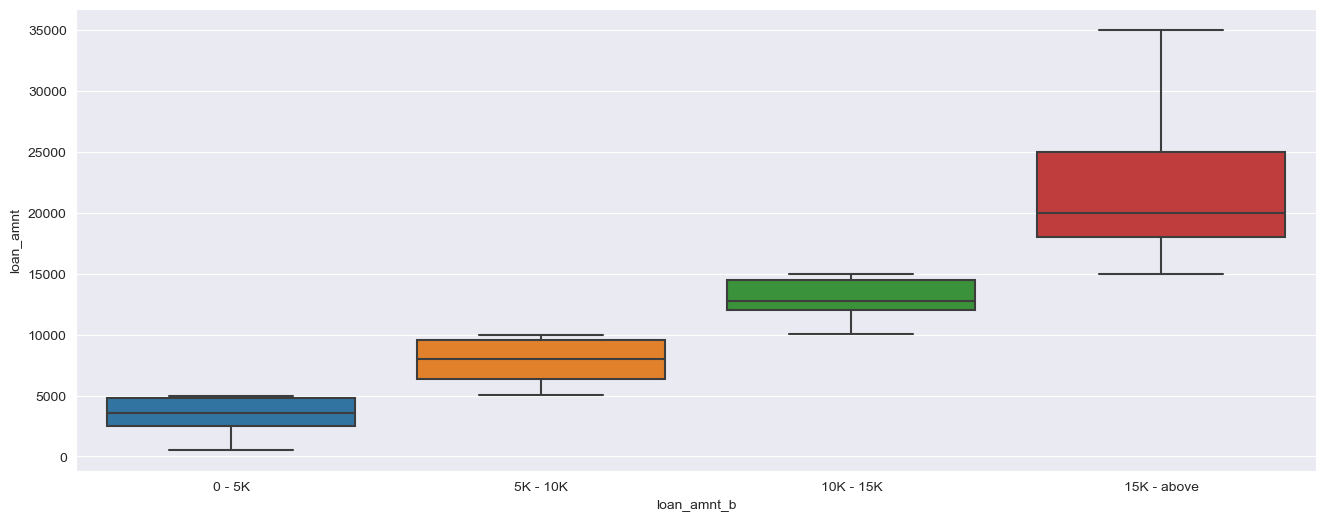

In [225]:
# Plotting and Validating Categories
plot.figure(figsize=(16,6))
sea.boxplot(y=loan.loan_amnt,x=loan.loan_amnt_b)
plot.show()

### Analysing the data in the `funded_amnt_inv` variable

In [226]:
loan['funded_amnt_inv'].describe()

count    36847.000000
mean     10430.400868
std       7008.919433
min          0.000000
25%       5000.000000
50%       9000.000000
75%      14335.045000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

In [227]:
# Binning Funded Amount
def bucket_funded_amnt_inv(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column >5000) and (column <= 10000):
        return '5K - 10K'
    elif (column >10000) and (column <= 15000):
        return '10K - 15K'
    else:
        return '15K - above' # 75% quartile

loan['funded_amnt_inv_b'] = loan.apply(lambda x : bucket_funded_amnt_inv(x['funded_amnt_inv']), axis = 1)

### Plotting `funded_amnt_inv` to better understand the data

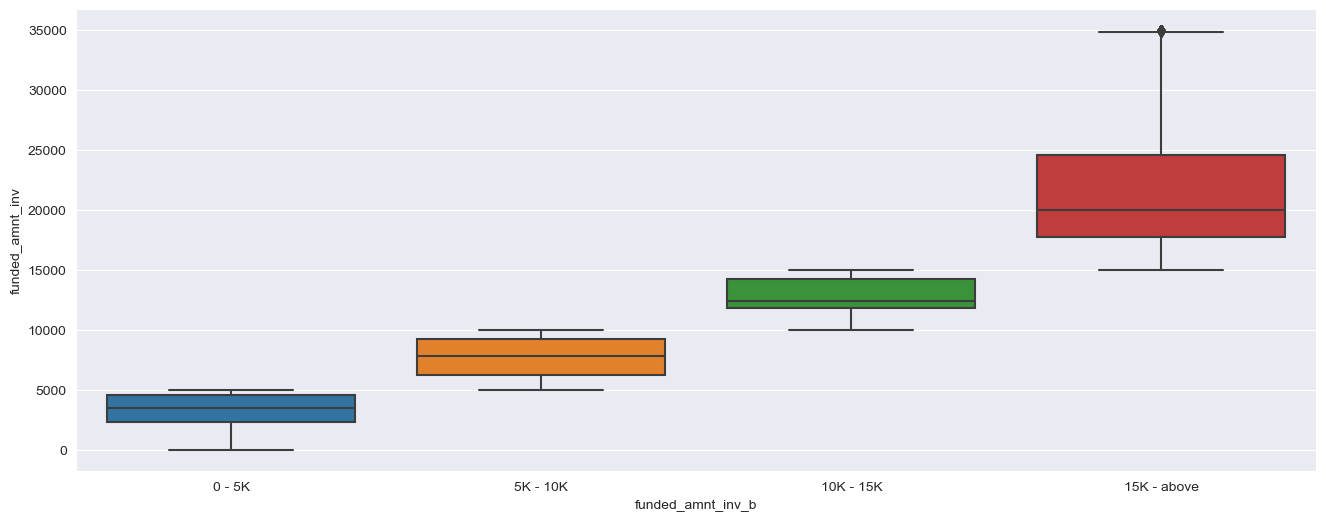

In [228]:
plot.figure(figsize=(16,6))
sea.boxplot(y=loan.funded_amnt_inv,x=loan.funded_amnt_inv_b)
plot.show()

### Analysing the data in the `funded_amnt` variable

In [229]:
loan['funded_amnt'].describe()

count    36847.000000
mean     10872.924526
std       7109.330771
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [230]:
# Binning Funded Amount
def bucket_funded_amnt(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column >5000) and (column <= 10000):
        return '5K - 10K'
    elif (column >10000) and (column <= 15000):
        return '10K - 15K'
    else:
        return '15K - above' # 75% quartile

loan['funded_amnt_b'] = loan.apply(lambda x : bucket_funded_amnt(x['funded_amnt']), axis = 1)

### Plotting `funded_amnt` to better understand the data

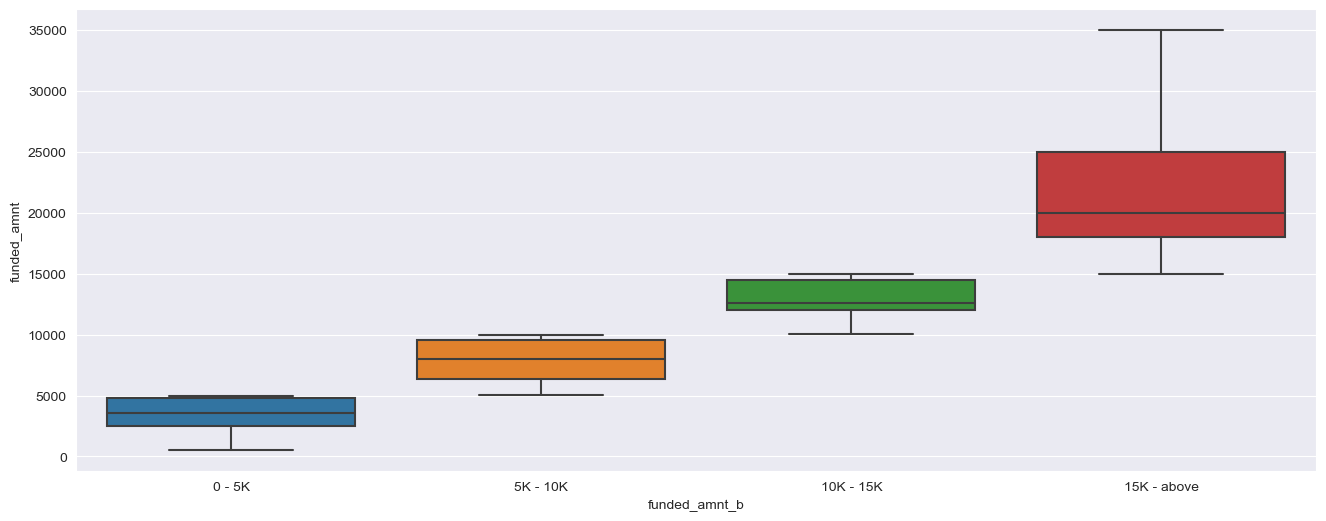

In [231]:
# Validating Categories
plot.figure(figsize=(16,6))
sea.boxplot(y=loan.funded_amnt,x=loan.funded_amnt_b)
plot.show()

### Analysing the data in the `annual_inc` variable

In [232]:
loan['annual_inc'].describe() / 1000

count      36.847000
mean       69.404482
std        64.027473
min         4.000000
25%        41.004000
50%        60.000000
75%        83.000000
max      6000.000000
Name: annual_inc, dtype: float64

In [233]:
# Binning Annual Income
def bucket_annual_inc(column):
    if column <= 40000:
        return '0 - 40k' # 25% quartile
    elif (column >40000) and (column <= 50000):
        return '40k - 50k'
    elif (column >50000) and (column <= 60000):
        return '50k to 60k'
    elif (column >60000) and (column <= 70000):
        return '60k to 70k'
    elif (column >70000) and (column <= 80000):
        return '70k to 80k'
    else:
        return '80k - above' # 75% quartile

loan['annual_inc_b'] = loan.apply(lambda x: bucket_annual_inc(x['annual_inc']), axis = 1)

### Analysing the data in the `int_rate` variable

In [234]:
loan['int_rate'].describe()

count    36847.000000
mean        11.988346
std          3.702091
min          5.420000
25%          8.940000
50%         11.860000
75%         14.520000
max         24.400000
Name: int_rate, dtype: float64

In [235]:
# Binning interest rate
def bucket_int_rate(column):
    if column <= 9:
        return 'Very Low' # 25% quartile
    elif (column >9) and (column <= 11):
        return 'Low'
    elif (column >11) and (column <= 13):
        return 'Moderate'
    elif (column >13) and (column <= 15):
        return 'High'
    else:
        return 'Very High' # 75% quartile

loan['int_rate_b'] = loan.apply(lambda x : bucket_int_rate(x.int_rate), axis = 1)

### Plotting `int_rate` to better understand the data

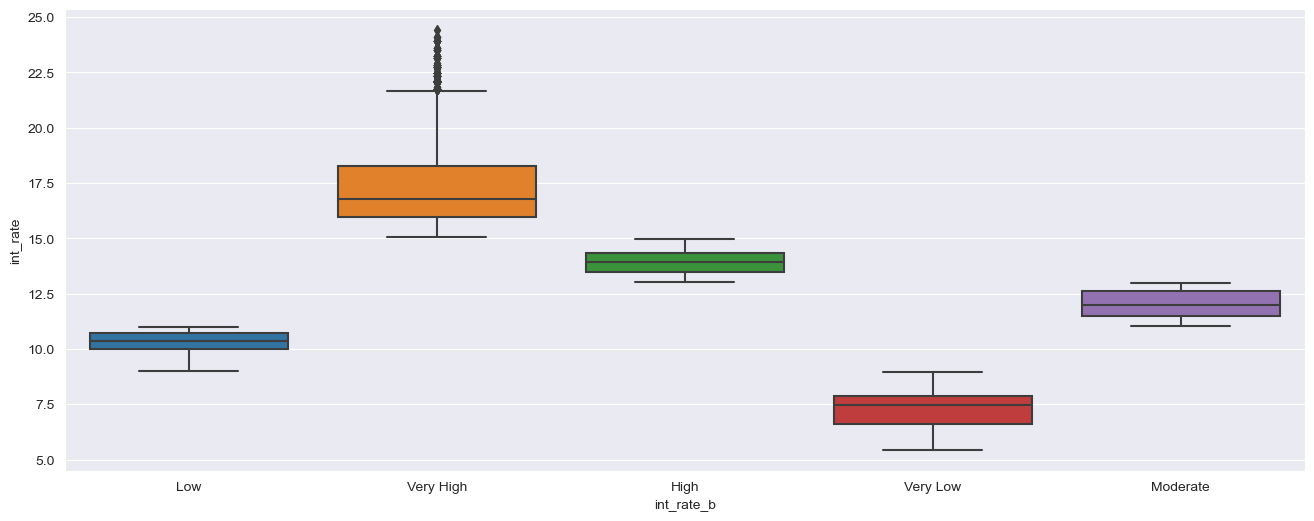

In [236]:
# Validating Categories
plot.figure(figsize=(16,6))
sea.boxplot(y=loan.int_rate,x=loan.int_rate_b)
plot.show()

In [237]:
### Analysing the data in the `dti` variable

In [238]:
loan['dti'].describe()

count    36847.000000
mean        13.330449
std          6.651565
min          0.000000
25%          8.210000
50%         13.420000
75%         18.590000
max         29.990000
Name: dti, dtype: float64

In [239]:
# Binning dti
def bucket_dti(column):
    if column <= 8:
        return 'Very Low' # 25% quartile
    elif (column >8) and (column <= 12):
        return 'Low'
    elif (column >12) and (column <= 16):
        return 'Moderate'
    elif (column >16) and (column <= 20):
        return 'High'
    else:
        return 'Very High' # 75% quartile

loan['dti_b'] = loan.apply(lambda x : bucket_dti(x.dti), axis = 1)

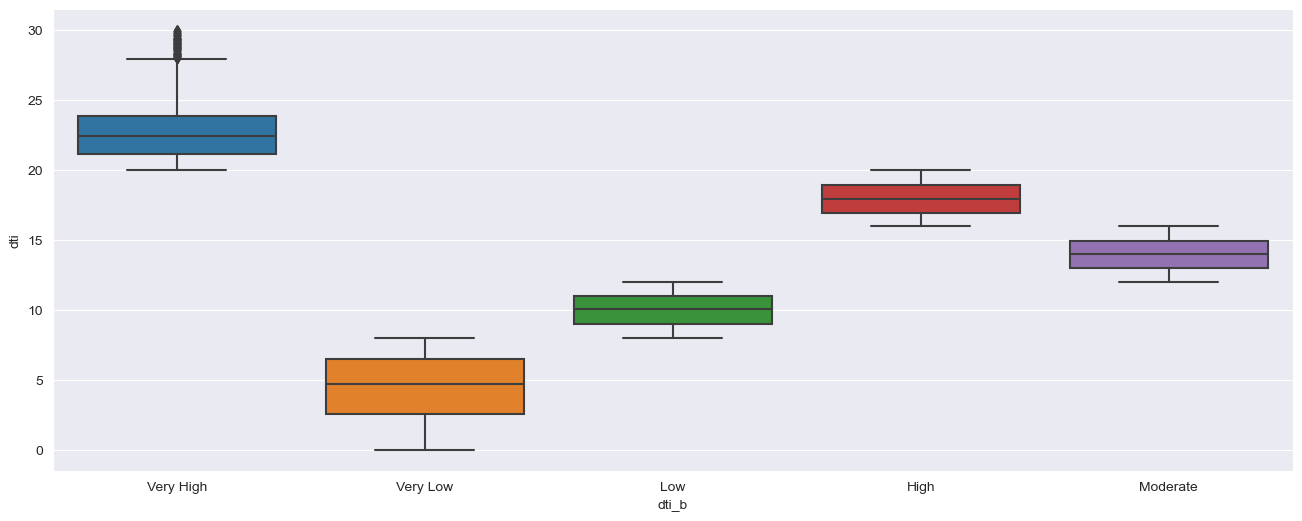

In [240]:
# Validating Categories
plot.figure(figsize=(16,6))
sea.boxplot(y=loan.dti,x=loan.dti_b)
plot.show()

# Re-analysing Data After the Cleanup
This includes the following steps:
1. Printing column info to analyse missing values, empty values in a column
2. Displaying retained columns in the final dataset which will be used for analysis

In [241]:
# Printing column info to analyse missing values, empty values in a column
print(loan.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36847 entries, 0 to 39680
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    36847 non-null  int64         
 1   loan_amnt             36847 non-null  float64       
 2   funded_amnt           36847 non-null  float64       
 3   funded_amnt_inv       36847 non-null  float64       
 4   term                  36847 non-null  int64         
 5   int_rate              36847 non-null  float64       
 6   installment           36847 non-null  float64       
 7   grade                 36847 non-null  object        
 8   emp_length            36847 non-null  float64       
 9   home_ownership        36847 non-null  object        
 10  annual_inc            36847 non-null  float64       
 11  verification_status   36847 non-null  object        
 12  issue_d               36847 non-null  datetime64[ns]
 13  loan_status     

In [242]:
loan.shape

(36847, 28)

In [243]:
loan.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'pub_rec_bankruptcies', 'issue_y', 'issue_m',
       'issue_q', 'loan_amnt_b', 'funded_amnt_inv_b', 'funded_amnt_b',
       'annual_inc_b', 'int_rate_b', 'dti_b'],
      dtype='object')

# Univeriate Analysis

In [244]:
# Column metadata used by functions below
column_titles = {
    'loan_amnt': 'Loan Amount',
    'funded_amnt': 'Funded Amount',
    'funded_amnt_inv': 'Funded Amount Investors',
    'term': 'Loan Term',
    'int_rate': 'Interest Rate',
    'installment': 'Installment',
    'grade': 'Grade',
    'emp_length': 'Employment Length',
    'home_ownership': 'Home Owner Status',
    'annual_inc': 'Annual Income',
    'verification_status': 'Verification Status',
    'issue_d': 'Issue Date',
    'loan_status': 'Loan Status',
    'purpose': 'Purpose of Loan',
    'addr_state': 'State',
    'dti': 'Debt To Income Ratio',
    'pub_rec_bankruptcies': 'Bankruptcies Record',
    'issue_y': 'Issue Year',
    'issue_m': 'Issue Month',
    'issue_q': 'Issue Quarter',
    'loan_amnt_b': 'Loan Amount Bins',
    'funded_amnt_inv_b': 'Investor Funded Bins',
    'funded_amnt_b': 'Funded Amount Bins',
    'annual_inc_b': 'Annual Income Bins',
    'int_rate_b': 'Interest Rate Bins',
    'dti_b': 'DTI Bins'
}

## Common Functions
Common functions used while conduction analysis

In [245]:
# This function creates a dictionary of outliers which includes the inter quartile range,
# lower and upper bound for a particular column.
# Formulae used in this analysis
# IQR = 75th Quartile - 25th Quartile
# Lower Bound = 25th Quartile - 1.5 * IQR
# Upper Bound = 75th Quartile + 1.5 * IQR

iqr_multiplier = 1.5

def get_iqr(df, column):
    quar25 = df[column].quantile(0.25)
    quar75 = df[column].quantile(0.75)
    iqr = quar75 - quar25
    lower = quar25 - iqr_multiplier * iqr
    upper = quar75 + iqr_multiplier * iqr
    return {'quartile1': quar25, 'quartile3': quar75, 'iqr': iqr, 'lower_bound': lower, 'upper_bound': upper}


# The function treat outliers, prints a box plot for each column under consideration
# Plot 1 = Before outlier treatment
# Plot 2 = Post outlier treatment
# Also prints statistics of how many rows and percentage of rows dropped
def outlier_comparison(df, column):
    # box plot before dropping outliers
    fig, p = plot.subplots(1,2,figsize=(14, 3))
    splot1 = sea.boxplot(df[column], ax=p[0], orient="h")
    splot1.set_title('Plot ['+ column + '] - Original')
    new_df = df[df[column] < get_iqr(df, column)['upper_bound']]
    # box plot after dropping outliers
    splot2 = sea.boxplot(new_df[column], ax=p[1])
    splot2.set_title('Plot [' + column + '] - Post Outlier Treatment')
    plot.tight_layout()
    plot.show()

def drop_outlier(df, column):
    old_rows = len(df)
    new_df = df[df[column] < get_iqr(df, column)['upper_bound']]
    new_rows = len(new_df)
    print('Rows dropped: ', old_rows - new_rows)
    print('Percentage rows dropped: ', round((old_rows - new_rows)/old_rows*100,2), "%")
    return new_df

In [246]:
def univariate_analysis(df, column):
    fig, p = plot.subplots(1,2, figsize=(16, 4))
    sea.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[0])
    sea.boxplot(x=column, data=df, ax=p[1])
    p[0].set_xlabel(column_titles[column])
    p[1].set_xlabel(column_titles[column])
    plot.tight_layout()
    plot.show()

In [247]:
# Bivariate analysis of columns against loan_status and calculate the ratio of Charge Offs
def analysis_vs_loan_status(df, col):
    fig, p = plot.subplots(1,2, figsize=(16, 4))
    splot = sea.countplot(df[col], ax=p[0])
    splot.set_xticklabels(splot.get_xticklabels(), rotation=90);
    p[0].set_title('['+ col + '] - loan_status=all')
    cross_tab = pd.crosstab(df[col], df['loan_status'], normalize='index')
    cross_tab.plot.bar(ax=p[1], stacked=True)
    p[1].set_title('['+ col + '] - Stacked')
    plot.show()


def continious_column_analysis(df, column):
    f, (ax1, ax2) = plot.subplots(nrows=1, ncols=2, figsize=(16,4))
    sea.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=ax1)
    sea.boxplot(x=column, y='loan_status', data=df, ax=ax2)
    ax1.set_xlabel(column_titles[column])
    ax2.set_xlabel(column_titles[column] + 'by Loan Status')
    plot.tight_layout()
    plot.show()
    # return group by dataframe for display comparison
    return df.groupby('loan_status')[column].describe()

def comparison_loan_status(df, column):
    df.groupby('loan_status')[column].value_counts().unstack().plot(kind='bar', figsize=[16,4])
    plot.show()


def ratio_wise(df, column):
    rw = df.pivot_table(index=column, columns='loan_status', values='id', aggfunc=len).reset_index()
    rw['total'] = rw['Charged Off'] + rw['Fully Paid']
    rw['charge_off_ratio'] = round(rw['Charged Off'] / rw['total'] * 100)
    rw.sort_values(by='total', ascending=False)
    return rw

def ratio_wise_plot(df, column, invert=False):
    plot.figure(figsize=[20,8])
    plot.title('Charged Off : ' + column_titles[column])
    rw = ratio_wise(df, column)
    if invert:
        sea.barplot(rw['charge_off_ratio'], rw[column])
    else:
        sea.barplot(rw[column], rw['charge_off_ratio'])
    plot.tight_layout()
    plot.show()
    return rw

def series_plot(df, column, hue=None, annot=1):
    temp = pd.Series()
    fig, ax = plot.subplots(figsize=(20,14))
    width = len(df[column].unique()) + 6 + 4 * len(temp.unique())
    fig.set_size_inches(width , 7)
    ax = sea.countplot(data = df, x=column, order=df[column].value_counts().index, hue=hue)
    if annot == 1:
        for p in ax.patches:
            ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df))), (p.get_x()+0.05, p.get_height()+20))
    elif annot == 2:
        for p in ax.patches:
            ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20))
    del temp
    plot.show()

--------------------------------

# Treating Outliers
Outlier treatment of the key variables and drop the outliers for cleaner data analysis

/Users/manikbajaj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/manikbajaj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


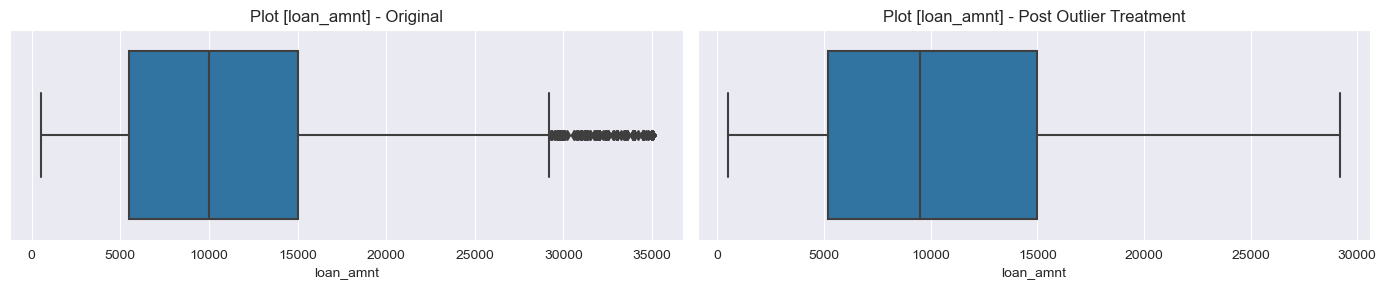

Rows dropped:  1078
Percentage rows dropped:  2.93 %


/Users/manikbajaj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/manikbajaj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


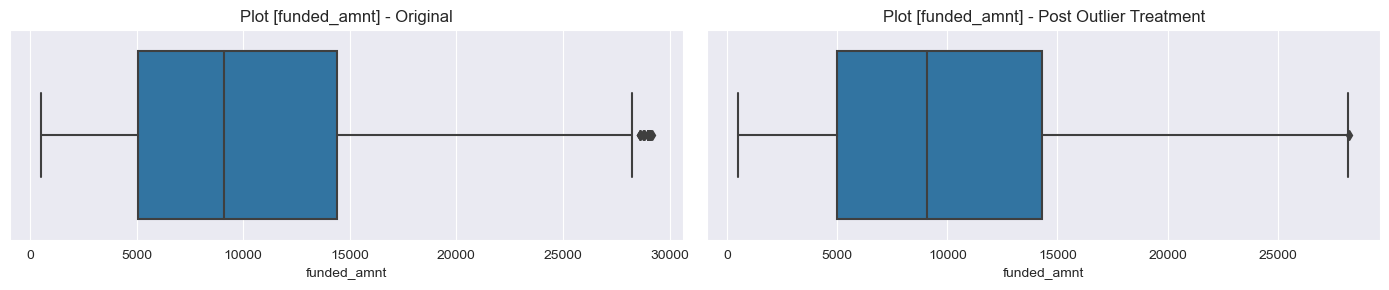

Rows dropped:  30
Percentage rows dropped:  0.08 %


/Users/manikbajaj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/manikbajaj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


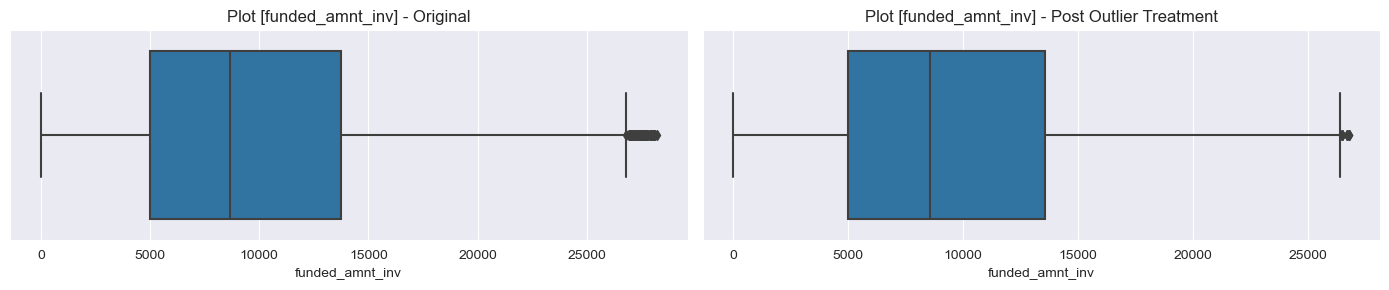

Rows dropped:  153
Percentage rows dropped:  0.43 %


/Users/manikbajaj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/manikbajaj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


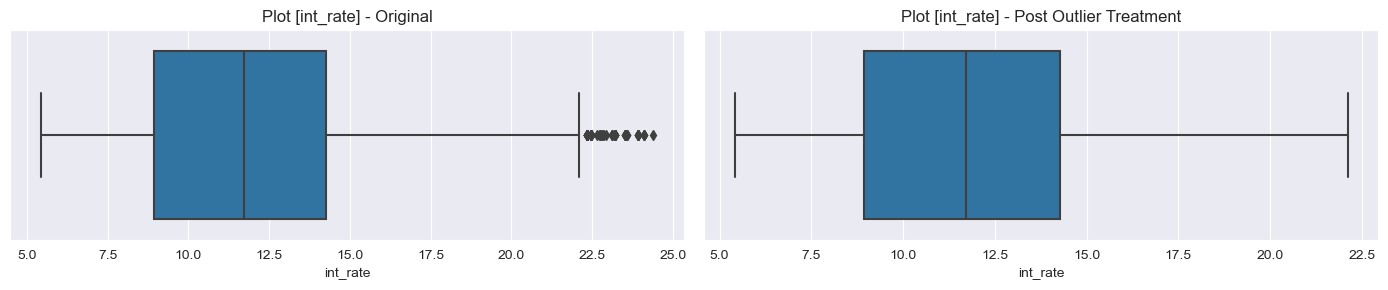

Rows dropped:  63
Percentage rows dropped:  0.18 %


/Users/manikbajaj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/manikbajaj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


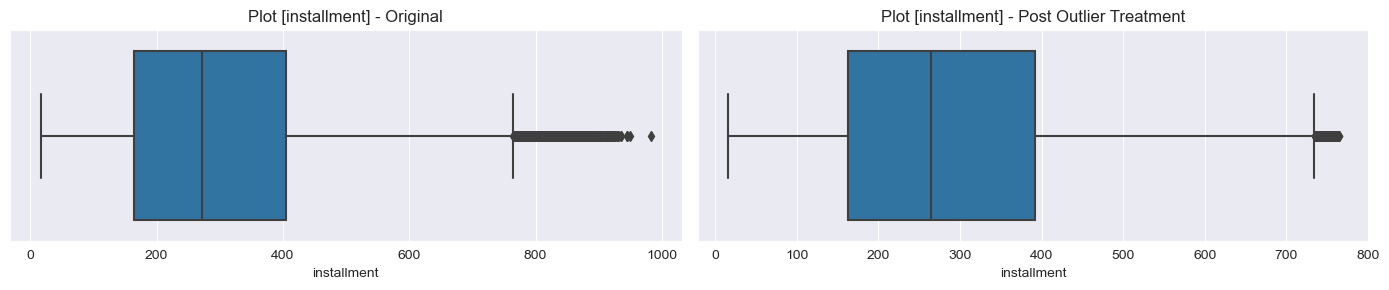

Rows dropped:  981
Percentage rows dropped:  2.76 %


/Users/manikbajaj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/manikbajaj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


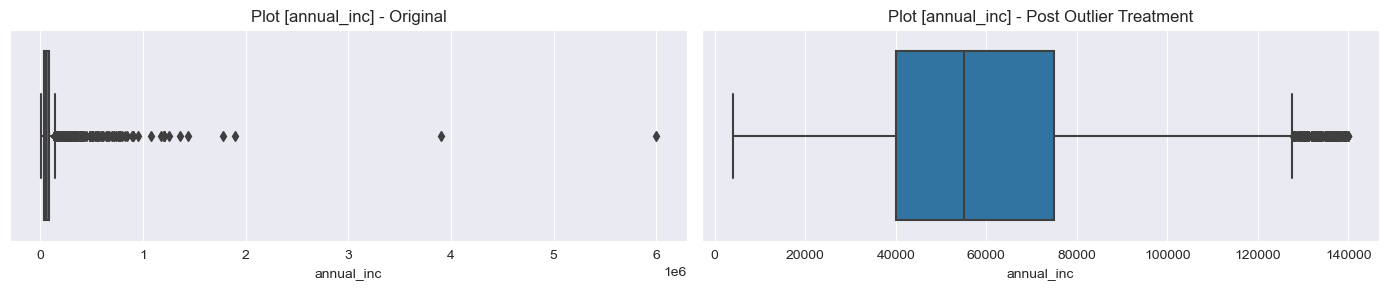

Rows dropped:  1486
Percentage rows dropped:  4.3 %


/Users/manikbajaj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/manikbajaj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


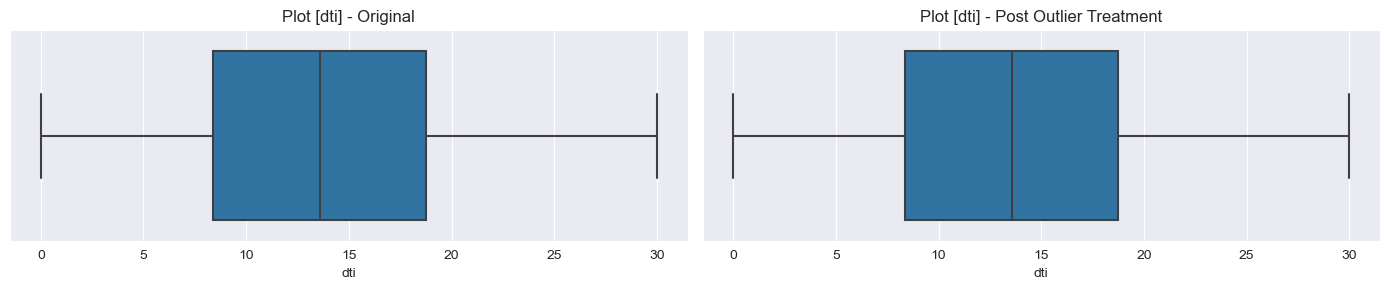

Rows dropped:  0
Percentage rows dropped:  0.0 %


In [248]:
original_row_count = len(loan)

outlier_treatment = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti']
for column in outlier_treatment:
    outlier_comparison(loan, column)
    loan = drop_outlier(loan, column)

# Identifying And Analysing Quantitative Variables
Quantitative variables are any variables where the data represent numbers.


### loan_amnt

/Users/manikbajaj/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


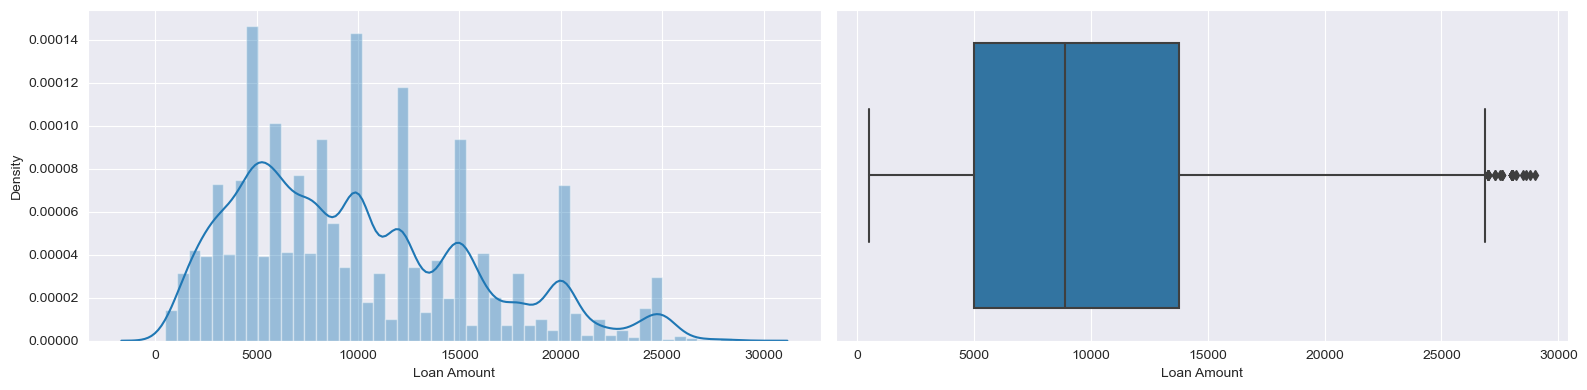

In [249]:
univariate_analysis(loan, 'loan_amnt')

> Outcome: Most of the loan_amount is in the range of 5K to 14K

### funded_amnt

/Users/manikbajaj/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


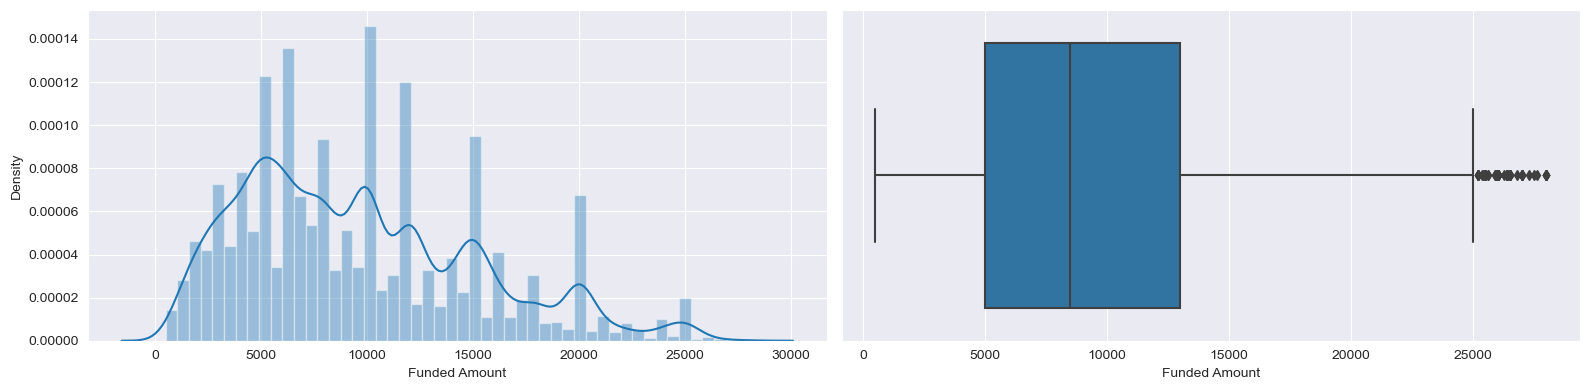

In [250]:
univariate_analysis(loan, 'funded_amnt')

> Outcome: Most of the funded_amnt is in the range of 5K to 13K

### funded_amnt_inv

/Users/manikbajaj/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


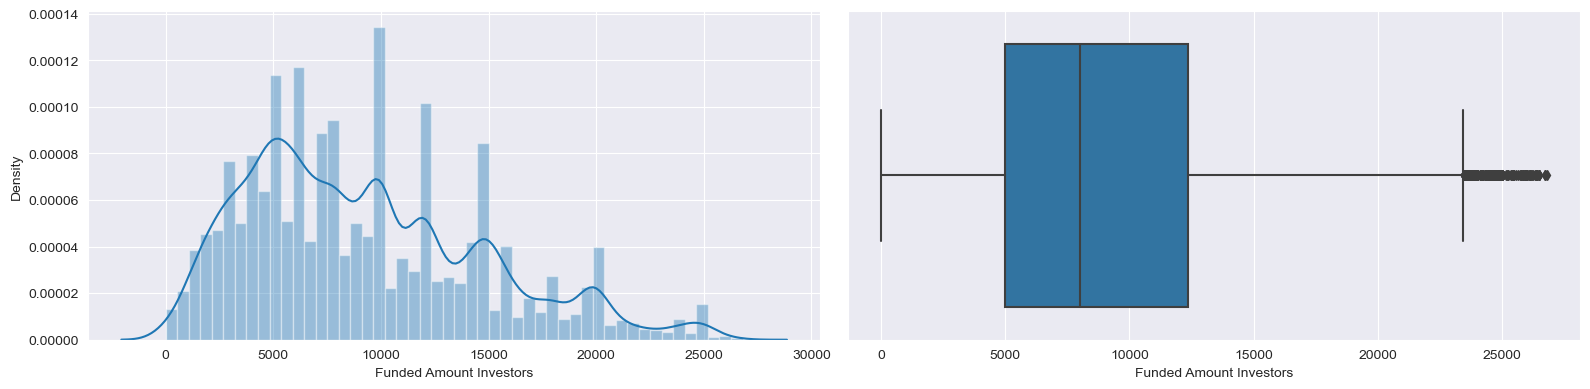

In [251]:
univariate_analysis(loan, 'funded_amnt_inv')

> Outcome: Most of the funded_amnt_inv is in the range of 5K to 12K

In [ ]:
### int_rate

/Users/manikbajaj/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


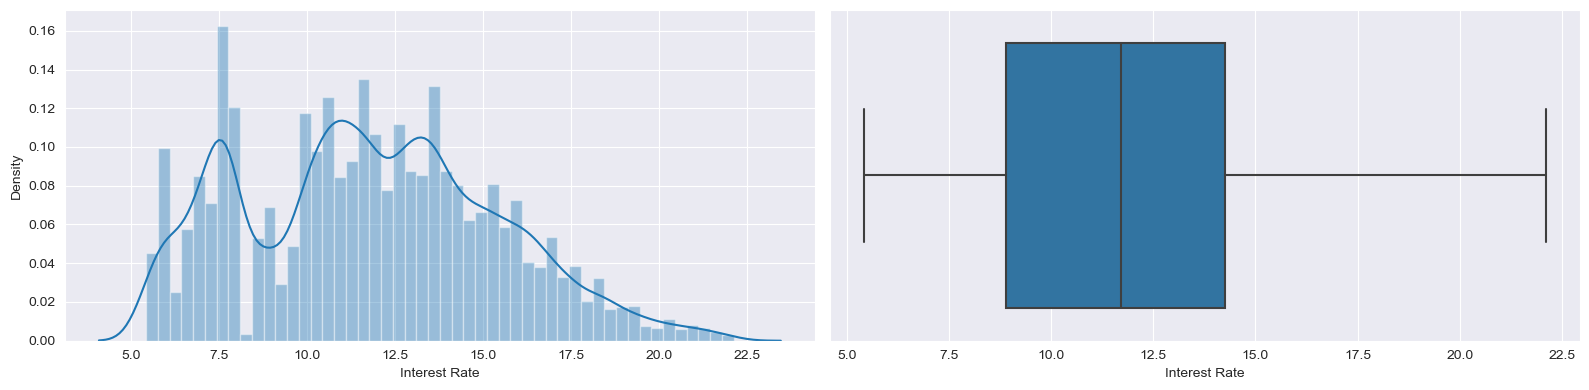

In [252]:
univariate_analysis(loan, 'int_rate')

> Outcome: Most of the interest rate is in the range of 5% to 16% going at the max to 22%